# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Adriel Genovan]
- **Email:** [adrielgenovan@gmail.com]
- **ID Dicoding:** [adrielgenovan]

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi cuaca mempengaruhi rental sepeda?
- Berapa proporsi Casual User dan Registered User?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [ ]:
file_path = '/content/drive/My Drive/Dicoding Analysis Data/day.csv'
day_data = pd.read_csv(file_path)
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
file_path = '/content/drive/My Drive/Dicoding Analysis Data/hour.csv'
hour_data = pd.read_csv(file_path)
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- file_path untuk membaca path file yang diakses dari drive
- day_data dan hour_data untuk mendeterminasikan variabel data yang dibaca
- day_data.head dan hour_data.head untuk memperlihatkan data

### Assessing Data

In [ ]:
day_data.info()
day_data.isna().sum()
print("Jumlah Duplikasi : ", day_data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah Duplikasi :  0


In [ ]:
hour_data.info()
hour_data.isna().sum()
print("Jumlah Duplikasi : ", hour_data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah Duplikasi :  0


**Insight:**
- day_data.info dan hour_data.info untuk menglihat kolom yang memiliki missing value dan mengecek apa data type sudah sesuai atau belum
- day_data.isna().sum() dan hour_data.isna().sum digunakan untuk menentukan kolom mana yang memiliki data yang hilang dan tingkat kehilangannya
-print digunakan untuk menampilkan data
- day_data.duplicated().sum() dan hour_data.duplicated().sum() untuk mensorot data duplikat yang mungkin mengganggu analisis atau meningkatkan metrik

### Cleaning Data

In [ ]:
day_data.duplicated().sum()
print("Jumlah Duplikasi : ", day_data.duplicated().sum())
day_data.drop_duplicates(inplace=True)
day_data.isna().sum()

Jumlah Duplikasi :  0


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
hour_data.duplicated().sum()
print("Jumlah Duplikasi : ", hour_data.duplicated().sum())
hour_data.drop_duplicates(inplace=True)
hour_data.isna().sum()

Jumlah Duplikasi :  0


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- day_data.drop_duplicates(inplace=True) dan hour_data.drop_duplicates(inplace=True) untuk menghapus baris duplikat dari dataFrame dan memperbaruinya secara langsung dikarenan argument inplace=True


## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
day_data.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
397,398,2012-02-02,1,1,2,0,4,1,2,0.399167,0.398971,0.672917,0.187187,190,3571,3761
471,472,2012-04-16,2,1,4,1,1,0,1,0.664167,0.614925,0.561667,0.284829,1198,5172,6370
669,670,2012-10-31,4,1,10,0,3,1,2,0.357500,0.361100,0.666667,0.166667,419,5147,5566
437,438,2012-03-13,1,1,3,0,2,1,1,0.565000,0.542929,0.617500,0.236950,762,5085,5847
363,364,2011-12-30,1,0,12,0,5,1,1,0.311667,0.318812,0.636667,0.134337,491,2508,2999


In [ ]:
day_data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:
day_data.dteday.is_unique

True

In [ ]:
day_data.dteday.duplicated()

,dteday
0,False
1,False
2,False
3,False
4,False
...,...
726,False
727,False
728,False
729,False


In [ ]:
day_data.groupby(by="season").agg({
    "dteday": "nunique",
    "yr": ["max", "min", "mean", "std", ]
})

dteday  yr                        
       nunique max min      mean       std
season                                    
1          181   1   0  0.502762  0.501379
2          184   1   0  0.500000  0.501364
3          188   1   0  0.500000  0.501335
4          178   1   0  0.500000  0.501410

In [ ]:
day_data.groupby(by="workingday")['dteday'].nunique().sort_values(ascending=False)

,dteday
workingday,
1,500
0,231


In [ ]:
hour_data.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7710,7711,2011-11-22,4,0,11,21,0,2,1,2,0.46,0.4545,1.00,0.2537,4,86,90
2631,2632,2011-04-24,2,0,4,13,0,0,0,1,0.70,0.6515,0.58,0.2836,205,236,441
11117,11118,2012-04-13,2,1,4,10,0,5,1,1,0.44,0.4394,0.38,0.1940,59,133,192
2221,2222,2011-04-07,2,0,4,10,0,4,1,2,0.42,0.4242,0.67,0.1045,29,66,95
8308,8309,2011-12-17,4,0,12,20,0,6,0,1,0.22,0.2121,0.69,0.2537,7,99,106


In [ ]:
monthly_hour = hour_data["mnth"]- hour_data["hr"]
monthly_hour = monthly_hour.apply(lambda x: abs(x))
hour_data["monthly_hour"] = round(monthly_hour/24)

In [ ]:
hour_data.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,monthly_hour
6722,6723,2011-10-12,4,0,10,16,0,3,1,2,0.56,0.5303,0.88,0.2239,5,50,55,0.0
16918,16919,2012-12-12,4,1,12,17,0,3,1,2,0.32,0.3030,0.53,0.2239,21,540,561,0.0
1786,1787,2011-03-20,1,0,3,3,0,0,0,1,0.28,0.2727,0.56,0.2537,1,11,12,0.0
12801,12802,2012-06-22,3,1,6,14,0,5,1,1,0.88,0.8030,0.39,0.2239,65,198,263,0.0
6760,6761,2011-10-14,4,0,10,6,0,5,1,3,0.56,0.5303,0.88,0.1940,4,90,94,0.0


In [ ]:
hour_data.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,monthly_hour
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.191323
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.393354
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,0.000000


<Axes: >

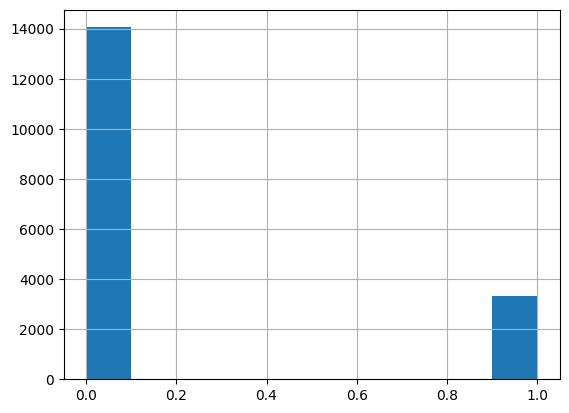

In [ ]:
hour_data.monthly_hour.hist()

In [ ]:
all_data = pd.merge(
    left=day_data,
    right=hour_data,
    how="left",
    left_on="dteday",
    right_on="dteday",
    suffixes=('_day', '_hour')
)
all_data.head()

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour,monthly_hour
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.81,0.0,3,13,16,0.0
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.22,0.2727,0.80,0.0,8,32,40,0.0
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.22,0.2727,0.80,0.0,5,27,32,0.0
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.75,0.0,3,10,13,0.0
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.75,0.0,0,1,1,0.0


In [ ]:
all_data.groupby(by=["temp_hour", "atemp_hour"]).agg({
    "weathersit_hour": "sum",
    "season_hour": "sum"
})

weathersit_hour  season_hour
temp_hour atemp_hour                              
0.02      0.0000                    1            1
          0.0152                    5            4
          0.0303                    2            1
          0.0455                    4            4
          0.0606                    5            5
...                               ...          ...
0.96      0.8636                   11           27
          0.9091                    4           12
          1.0000                    1            3
0.98      0.9242                    1            3
1.00      0.8636                    1            3

[294 rows x 2 columns]

**Insight:**
- .describe(), .sample(), .hist() untuk mendeskripsikan statics dan distribusi variabel yang memudahkan untuk mengerti rentang, kecenderungan , central,dan potensi outliers
- membuat fitur monthly_hour untuk membuat relasi antara month dan hour
- mengexplore relasi antara  "temp_hour," "atemp_hour," "weathersit_hour," dan "season_hour" untuk mengetahui pengaruh cuaca terhadap rental
- pd.merge untuk menggabungkan kumpulan data sehingga mendapatkan data tingkat day dan hour yang berpotensi mengindentifikasi pola yang lebih komplex

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kondisi cuaca mempengaruhi rental sepeda?

In [ ]:
all_data.sample(5)

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour,monthly_hour
14438,607,2012-08-29,3,1,8,0,3,1,1,0.685000,...,1,1,0.70,0.6515,0.54,0.1940,120,523,643,0.0
6166,262,2011-09-19,3,0,9,0,1,1,2,0.549167,...,1,2,0.58,0.5455,0.60,0.0896,51,138,189,0.0
8719,369,2012-01-04,1,1,1,0,3,1,2,0.107500,...,1,1,0.02,0.0152,0.34,0.2836,0,1,1,0.0
13869,584,2012-08-06,3,1,8,0,1,1,2,0.752500,...,1,2,0.72,0.6970,0.79,0.1343,0,5,5,0.0
10694,451,2012-03-26,2,1,3,0,1,1,1,0.445833,...,1,1,0.46,0.4545,0.24,0.4478,65,599,664,1.0


In [ ]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


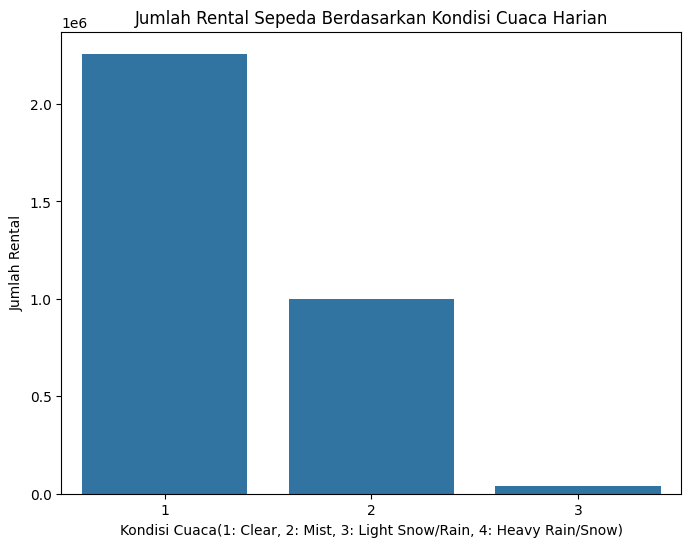

In [ ]:
weather_rentals_day = day_data.groupby('weathersit')['cnt'].sum().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='weathersit', y='cnt', data=weather_rentals_day)
plt.title('Jumlah Rental Sepeda Berdasarkan Kondisi Cuaca Harian')
plt.xlabel('Kondisi Cuaca(1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Rain/Snow)')
plt.ylabel('Jumlah Rental')
plt.show()

In [ ]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,monthly_hour
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0.0


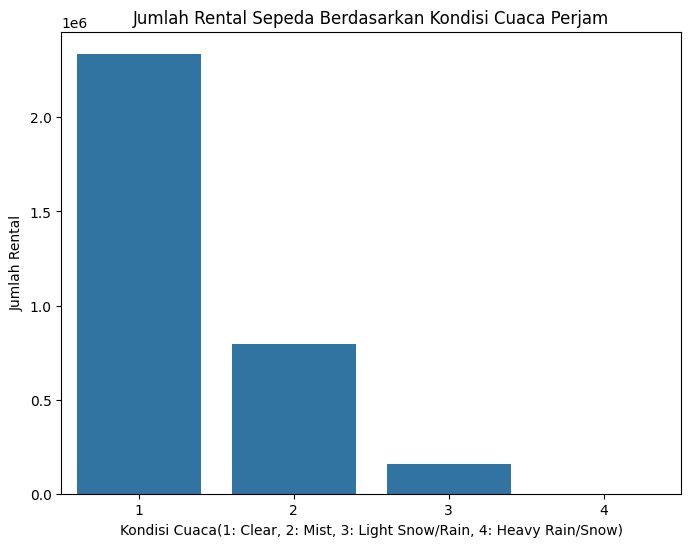

In [ ]:
weather_rentals_hour = hour_data.groupby('weathersit')['cnt'].sum().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='weathersit', y='cnt', data=weather_rentals_hour)
plt.title('Jumlah Rental Sepeda Berdasarkan Kondisi Cuaca Perjam')
plt.xlabel('Kondisi Cuaca(1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Rain/Snow)')
plt.ylabel('Jumlah Rental')
plt.show()

### Pertanyaan 2: Berapa proporsi Casual User dan Registered User?

In [ ]:
all_data.sample(5)

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour,monthly_hour
6217,264,2011-09-21,3,0,9,0,3,1,2,0.595000,...,1,2,0.66,0.6212,0.74,0.1045,43,142,185,0.0
11250,474,2012-04-18,2,1,4,0,3,1,2,0.463333,...,1,2,0.42,0.4242,0.77,0.0000,14,56,70,1.0
4615,197,2011-07-16,3,0,7,0,6,0,1,0.686667,...,0,1,0.58,0.5455,0.78,0.0896,4,6,10,0.0
8320,352,2011-12-18,4,0,12,0,0,0,1,0.238333,...,0,1,0.20,0.2576,0.69,0.0000,1,31,32,0.0
4774,203,2011-07-22,3,0,7,0,5,1,1,0.848333,...,1,1,0.84,0.8182,0.56,0.0000,46,166,212,1.0


In [ ]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


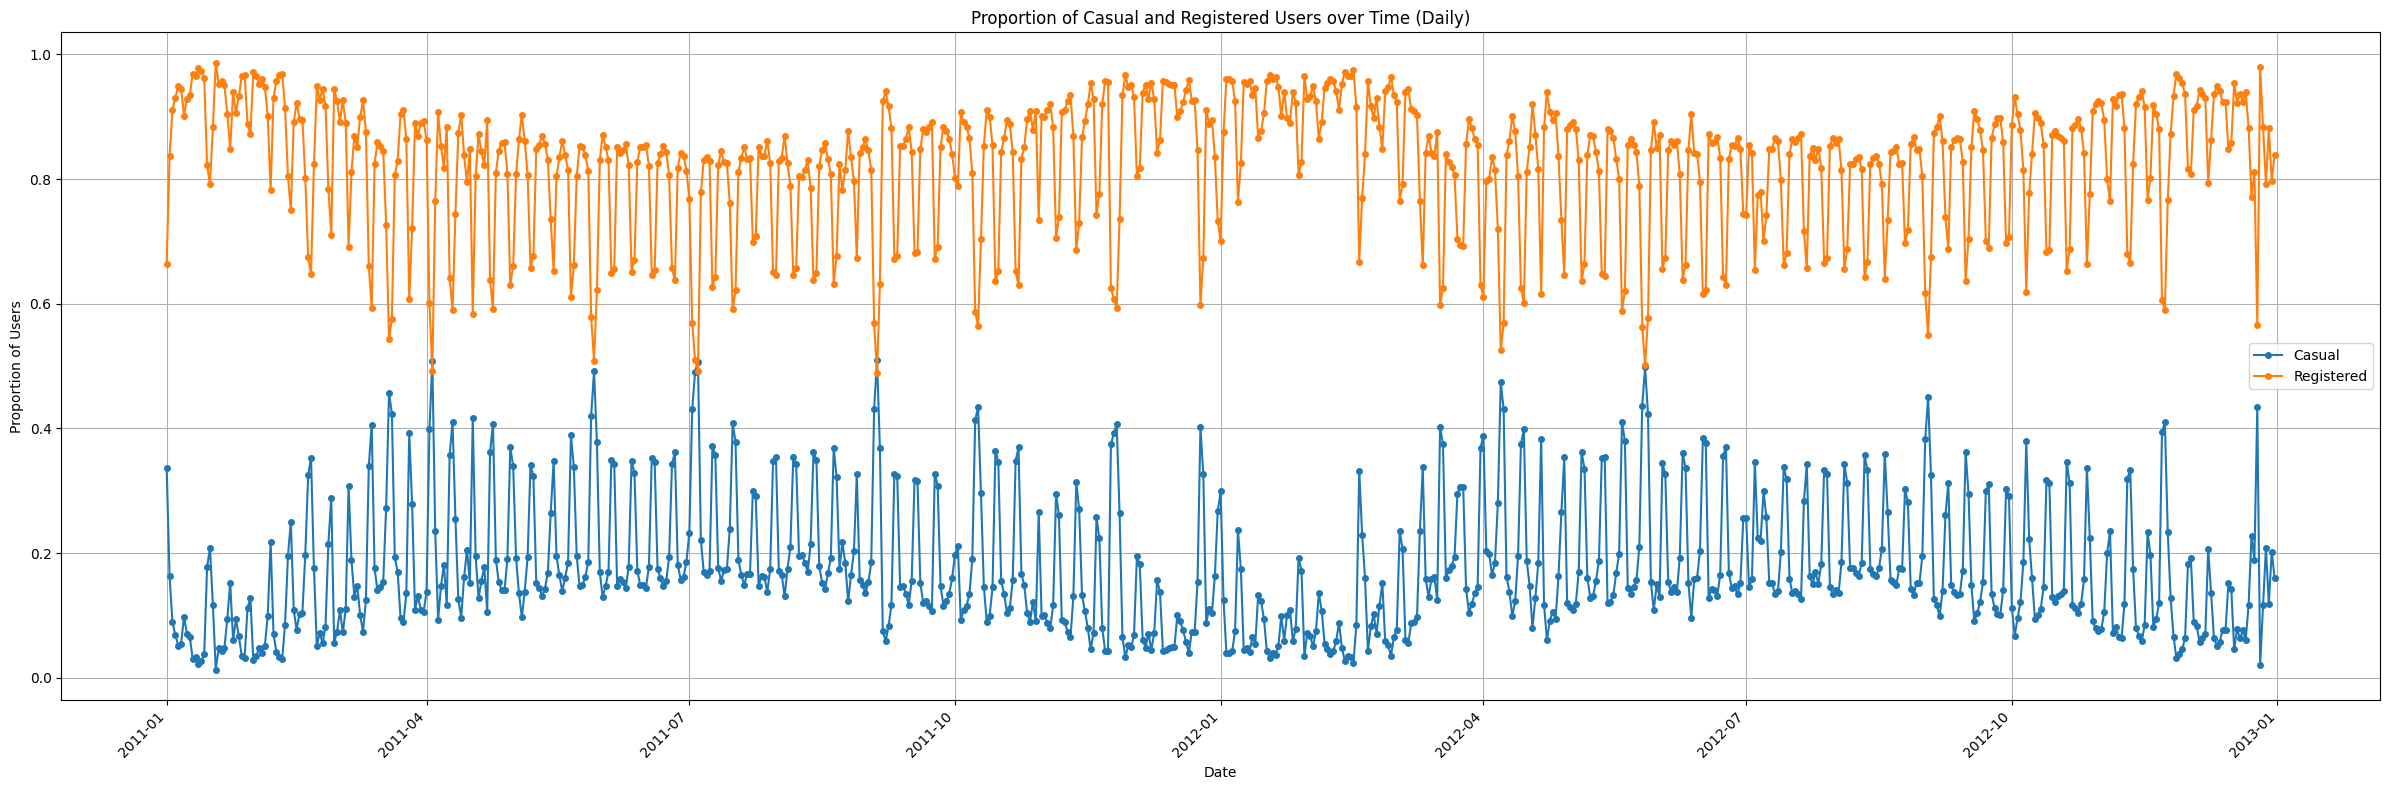

In [ ]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

day_data['total_users'] = day_data['casual'] + day_data['registered']

day_data['casual_proportion'] = day_data['casual'] / day_data['total_users']
day_data['registered_proportion'] = day_data['registered'] / day_data['total_users']


plt.figure(figsize=(24, 8))
plt.plot(day_data['dteday'], day_data['casual_proportion'], marker='o', linestyle='-', label='Casual', markersize=4)
plt.plot(day_data['dteday'], day_data['registered_proportion'], marker='o', linestyle='-', label='Registered', markersize=4)

plt.title('Proportion of Casual and Registered Users over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Proportion of Users')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()

In [ ]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,monthly_hour
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0.0


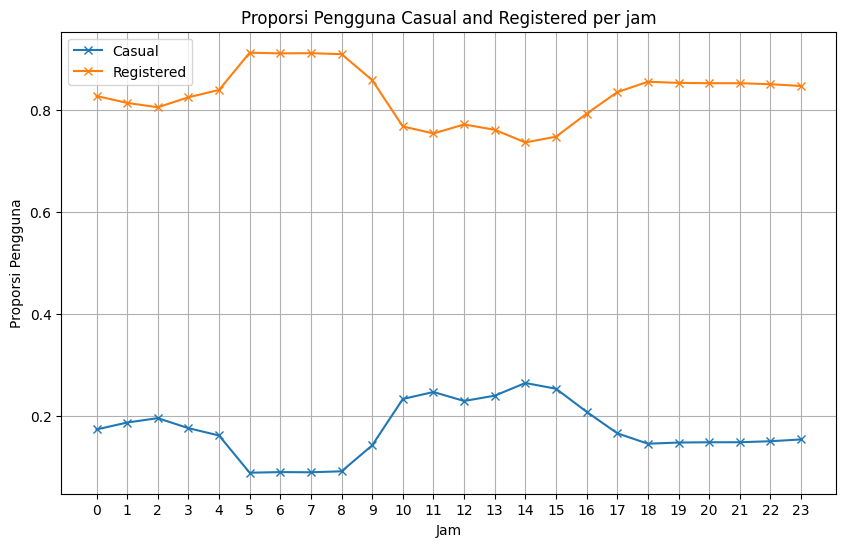

In [ ]:
hour_data['total_users'] = hour_data['casual'] + hour_data['registered']

hour_data['casual_proportion'] = hour_data['casual'] / hour_data['total_users']
hour_data['registered_proportion'] = hour_data['registered'] / hour_data['total_users']

hourly_proportion = hour_data.groupby('hr')[['casual_proportion', 'registered_proportion']].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(hourly_proportion['hr'], hourly_proportion['casual_proportion'], marker='x', label='Casual')
plt.plot(hourly_proportion['hr'], hourly_proportion['registered_proportion'], marker='x', label='Registered')

plt.title('Proporsi Pengguna Casual and Registered per jam')
plt.xlabel('Jam')
plt.ylabel('Proporsi Pengguna')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

**Insight:**
- Pertanyaan 1 :
grafik bar mem visualisasikan relasi antara kondisi cuaca ("weathersit") dengan banyaknya sepeda yang disewakan ("cnt") pada harian dan jam yang mengungkapkan bagaimana cuaca mempengaruhi banyaknya sepeda yang disewakan
Dalam analisis menunjukan bahwa cuaca cerah secara konsisten mempunyai jumlah penyewaan yang tinggi.
Dalam analisis juga menunjukan bahwa cuaca buruk seperti salju/hujang ringan dan hujan/salju lebat mempengaruhi banyaknya sepeda yang disewa
- Pertanyaan 2 :
segmentasi pengguna yang terdaftar pada harian dan jam menggunakan grafik garis
dalam analisis menunjukan pengguna terdaftar secara konsisten menyumbang penyewaan sepeda lebih besar dari pada pengguna kasual

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2